# Predicting stock prices using basic Mashine Learning algorithms in Python

In this project I will use ...... to get predictions of Tesla and Apple stock prices.
Mashine learning - 

###### Import Libraries
Pandas - for loading data and performing analytics.
NumPy - support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. (For fast and large computations)
Matplotlib - plotting library and its numerical mathematics extension NumPy.
Seaborn - is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost as xgb
import matplotlib.cbook as cbook
import matplotlib.dates as mdates



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import xgboost as xgb
#from tensorflow.keras.layers import LSTM
#from tensorflow.python.keras.layers.recurrent import LSTM
import keras as ks
import warnings

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'nasdaqdatalink'

#### Import Data
Tesla pricing for the past 10 years from  Sept 2013 to Sept 2023 taken from https://www.nasdaq.com/

In [24]:
df = pd.read_csv('/Users/yulia/Downloads/HistoricalData_Tesla.csv')
df = df.iloc[::-1]
df.head()


,Date,Close_last,Volume,Open,High,Low
2516,9/30/13,12.89,133849178,12.60,12.97,12.53
2515,10/1/13,12.87,116320352,12.93,12.95,12.56
2514,10/2/13,12.06,310766545,12.57,12.79,11.69
2513,10/3/13,11.55,356474372,11.67,11.98,11.20
2512,10/4/13,12.07,215514642,11.76,12.08,11.51


In [25]:
df.tail()


,Date,Close_last,Volume,Open,High,Low
4,9/22/23,244.88,127524100,257.40,257.79,244.48
3,9/25/23,246.99,104636600,243.38,247.10,238.31
2,9/26/23,244.12,101993600,242.98,249.55,241.66
1,9/27/23,240.50,136597200,244.26,245.33,234.58
0,9/28/23,246.38,117058900,240.02,247.55,238.65


#### Basic Stats

In [4]:
df.describe(include='all')

,Date,Close_last,Volume,Open,High,Low
count,2517,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
unique,2517,NaN,NaN,NaN,NaN,NaN
top,9/7/16,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,88.252014,1.145874e+08,88.280536,90.292451,86.158764
std,NaN,106.684324,7.719750e+07,106.783169,109.274638,104.104230
min,NaN,8.030000,1.065415e+07,7.960000,8.180000,7.740000
25%,NaN,15.370000,6.627384e+07,15.380000,15.650000,15.140000
50%,NaN,21.100000,9.311551e+07,21.080000,21.460000,20.700000
75%,NaN,184.510000,1.353223e+08,184.520000,187.690000,180.310000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 2516 to 0
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close_last  2517 non-null   float64
 2   Volume      2517 non-null   int64  
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


#### Data Analytics

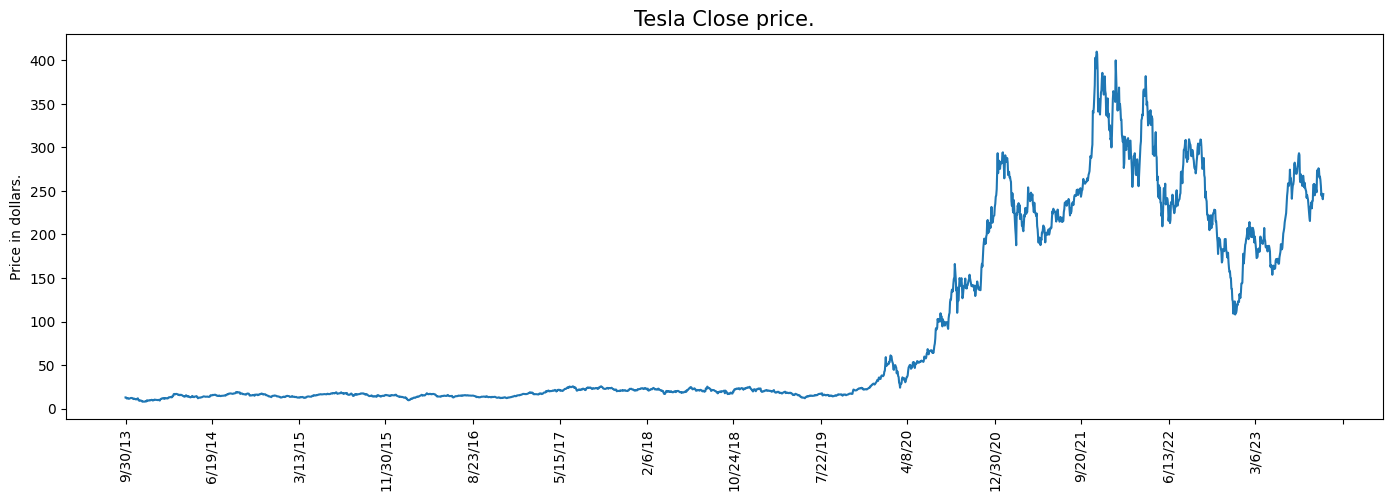

In [6]:
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(111)
plt.plot(df['Date'],df['Close_last'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.xticks(rotation='vertical')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.show()

### 

Distribution plot shows two peacks, data is left skewed.


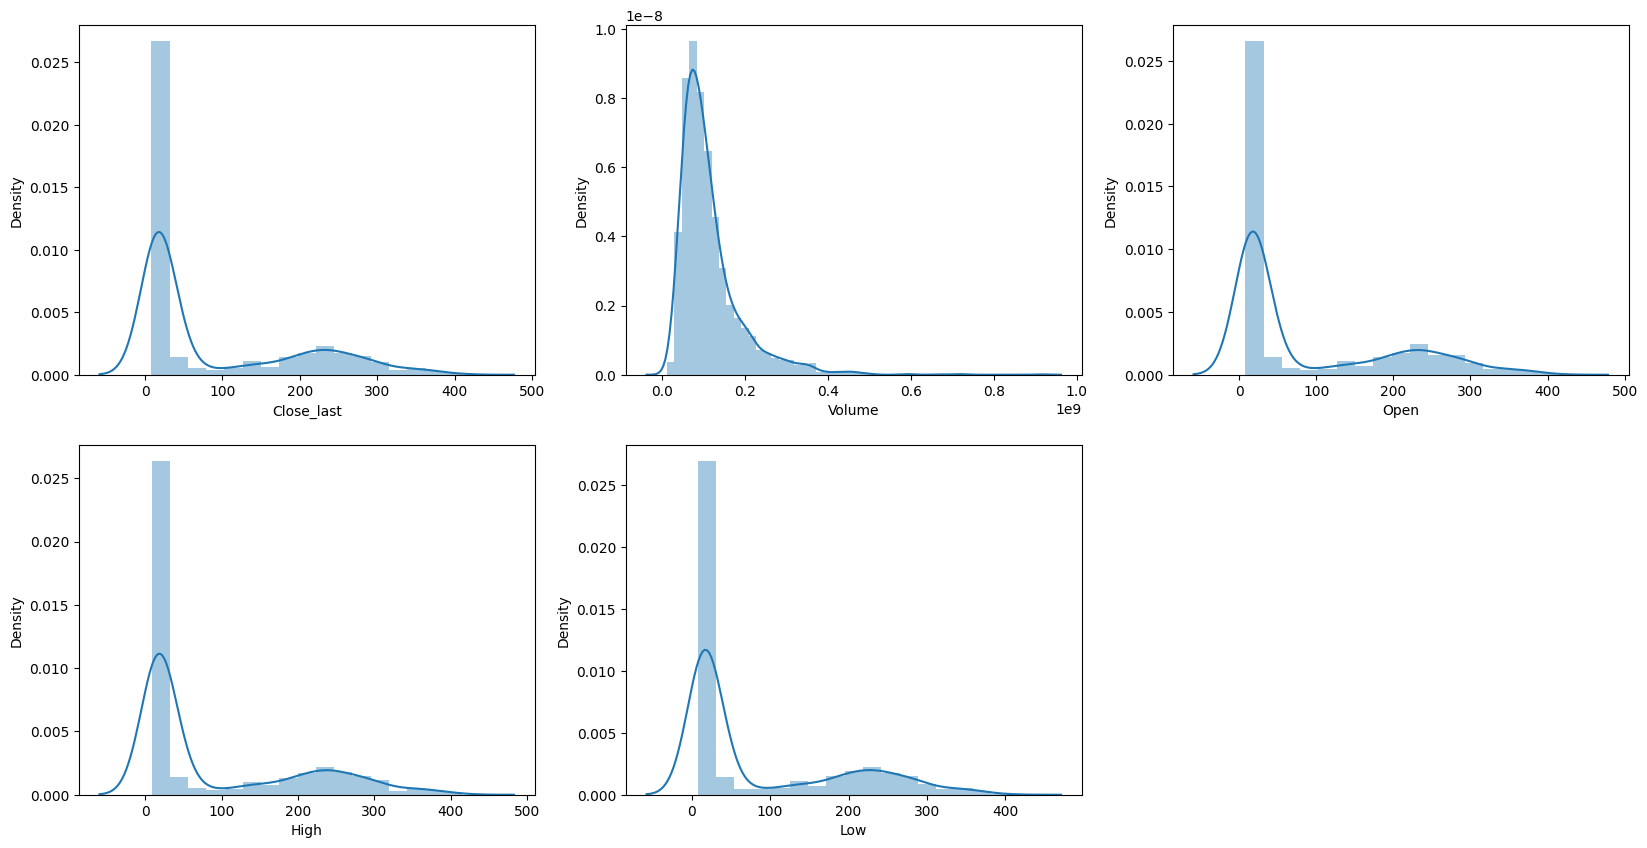

In [7]:
features = ['Close_last','Volume','Open', 'High', 'Low']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

Box plots showing that outlier points exist for Volume only

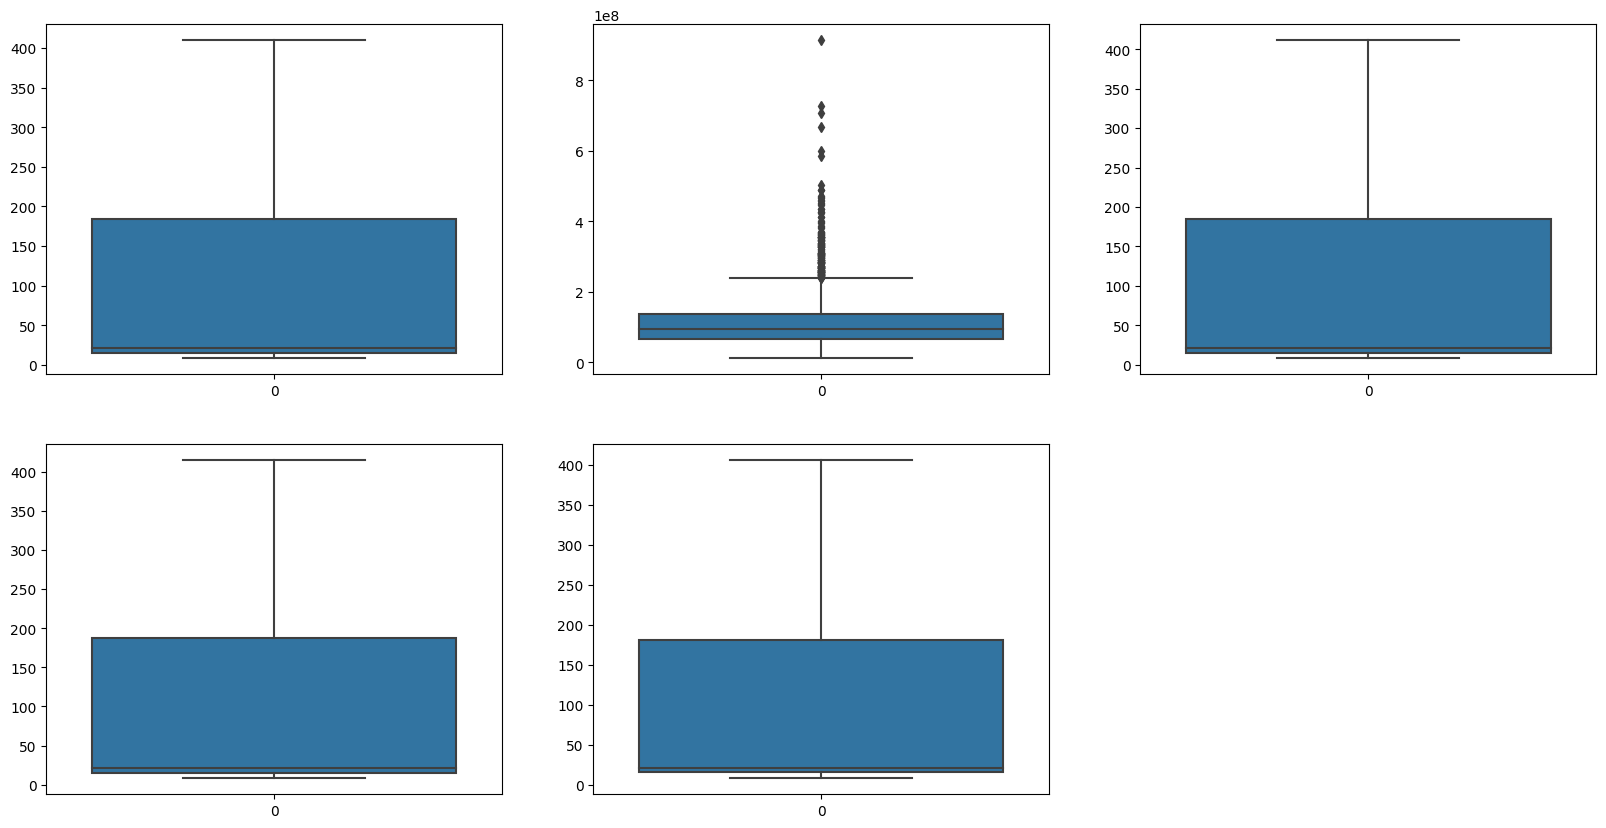

In [8]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


## Additional manipulations
We split the date to gert more information out of it and add poolean for defining the EOQ

In [9]:

splitted = df['Date'].str.split('/', expand=True)
 
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Close_last,Volume,Open,High,Low,day,month,year
2516,9/30/13,12.89,133849178,12.60,12.97,12.53,30,9,13
2515,10/1/13,12.87,116320352,12.93,12.95,12.56,1,10,13
2514,10/2/13,12.06,310766545,12.57,12.79,11.69,2,10,13
2513,10/3/13,11.55,356474372,11.67,11.98,11.20,3,10,13
2512,10/4/13,12.07,215514642,11.76,12.08,11.51,4,10,13


In [10]:

df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Close_last,Volume,Open,High,Low,day,month,year,is_quarter_end
2516,9/30/13,12.89,133849178,12.60,12.97,12.53,30,9,13,1
2515,10/1/13,12.87,116320352,12.93,12.95,12.56,1,10,13,0
2514,10/2/13,12.06,310766545,12.57,12.79,11.69,2,10,13,0
2513,10/3/13,11.55,356474372,11.67,11.98,11.20,3,10,13,0
2512,10/4/13,12.07,215514642,11.76,12.08,11.51,4,10,13,0


In [11]:
df.groupby('is_quarter_end').mean()

,Close_last,Volume,Open,High,Low,day,month,year
is_quarter_end,,,,,,,,
0,87.140492,1.161046e+08,87.194010,89.137743,85.085552,15.725690,6.097839,18.235894
1,90.428038,1.116173e+08,90.407626,92.553020,88.259788,15.783784,7.431257,18.247944


The above result shows that prices are on average higher at the quearter end nut the vlume is lower.

Now graphing yearly data

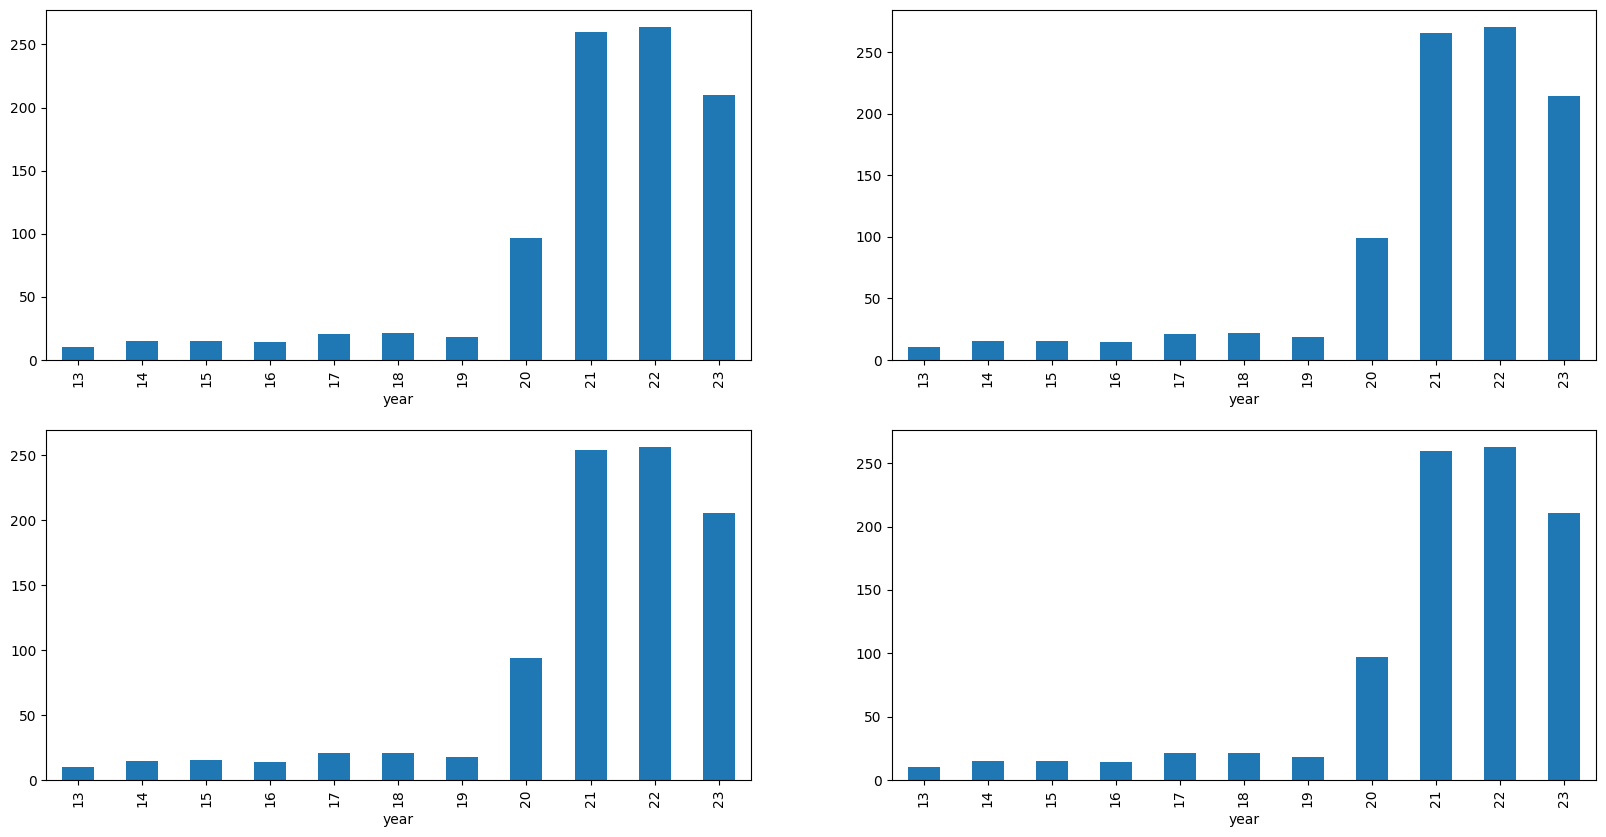

In [12]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close_last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

we can see that there was a significant increase in stick price between year 2019 and 2020 and then 2020 to 2021

In [13]:
df['open-close']  = df['Open'] - df['Close_last']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close_last'].shift(-1) > df['Close_last'], 1, 0)


Adding more values to help train the model: Difference Open-Close, Low-High and  the indicator of the PBD price being higher then Current day price

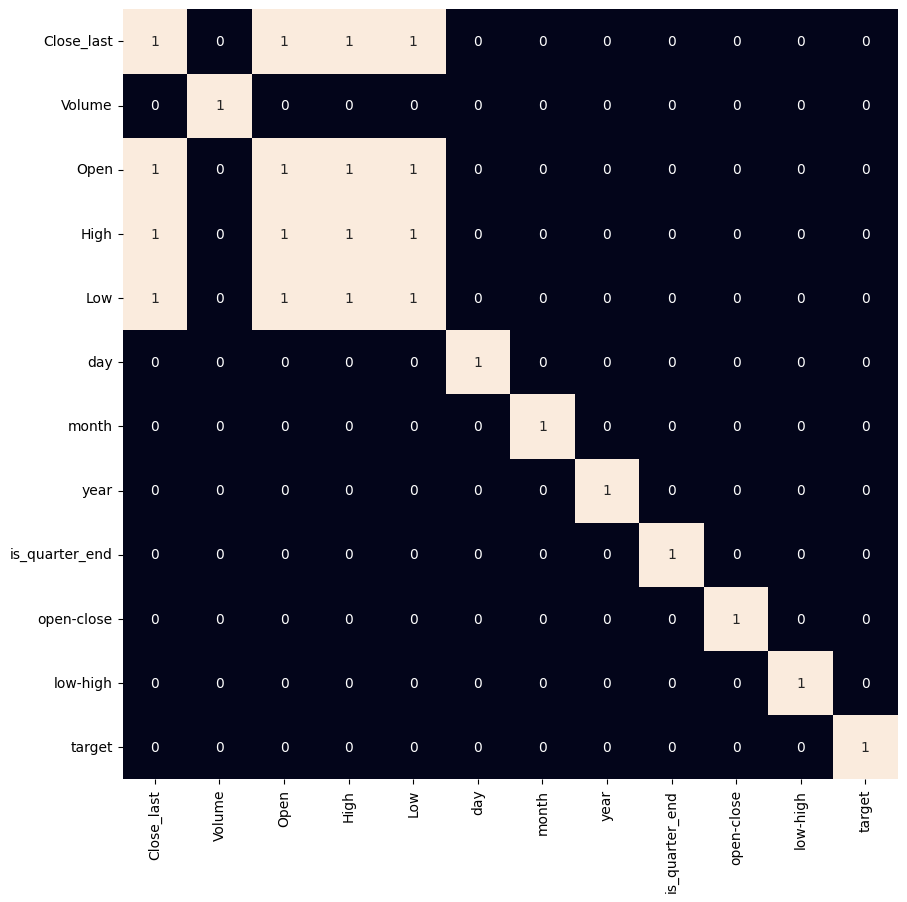

In [14]:
plt.figure(figsize=(10, 10))
 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Heat map shows that Open , High, Low Close_last are highly correlated

#### Data transformation

In [15]:

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2023)
print(X_train.shape, X_valid.shape)

(2265, 3) (252, 3)


#### ML algos

Checking out the traditional machine learning algos for stock prediction according to the articles available on Google
1. Logistic Regression -is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.Used for classification. 
2. Support Vector Machine, 
3. XGBClassifier
4. Also check the LSTM model and Arima, Random forest
Neural network. LSTM (Long-Short term memory) model lets you predict far into the future.

In [16]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True),xgb.XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5158366153246247
Validation Accuracy :  0.5095164609053499

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5138607915773056
Validation Accuracy :  0.4364711934156379

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 
Training Accuracy :  0.9249970754533048
Validation Accuracy :  0.525

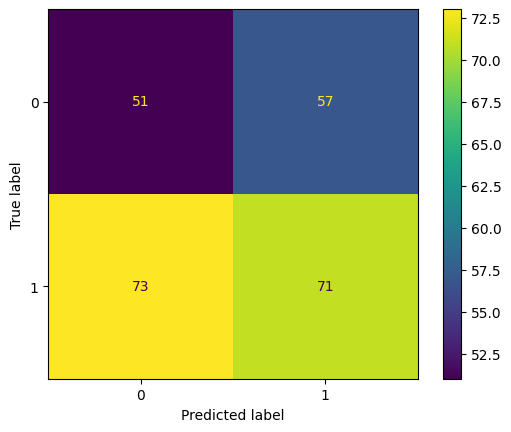

In [18]:
metrics.plot_confusion_matrix(models[2], X_valid, Y_valid)
plt.show()

### Interpreting the results
1. by comparing the above model results we can see that XGBC has rhw Highest accuracy, far higher then the other two models, however the difference between training and validation for this model is also the highest.
2.

Performing all the same steps on the Google stock price that has a longer history to vefiry if the results would be more accurate.